In [1]:
import numpy as np #    
import matplotlib
import tkinter

import pylab # модуль для построения графиков
import matplotlib.pyplot as plt #                                                              +                        
import cv2
import ipywidgets as widgets
from PIL import ImageEnhance
from PIL import Image # отрисовка изображений

from skimage import io, color
from skimage import util
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
import matplotlib.image as mpimg 
import os
from tensorflow.keras.preprocessing import image

In [3]:
import pydicom
from skimage.transform import rotate

#### Эталонное изображение

In [4]:
import tkinter as tk

#output_path = '000.png'

# 1. Сделать изображение "1.png" полупрозрачным
image1 = Image.open("gray_image152r.png")
image1 = image1.convert("RGBA")
data = image1.getdata()
new_data = []
for item in data:
    if item[0] == 0 and item[1] == 0 and item[2] == 0:
        new_data.append((0, 0, 0, 0))
    else:
        new_data.append((item[0], item[1], item[2], 64))
image1.putdata(new_data)
image1.save('000.png') # Сохранение преобразованного изображения

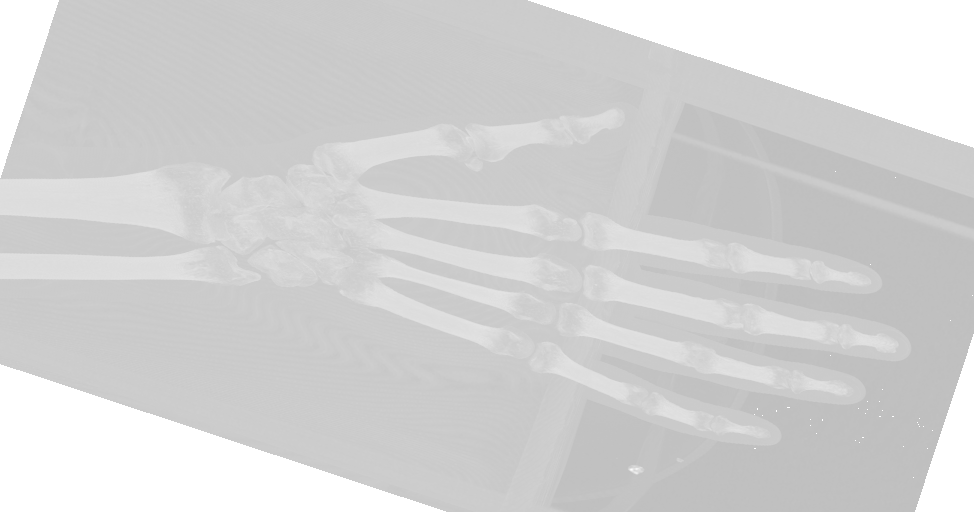

In [5]:
image1

# Линия в отдельный файл

# 1

In [6]:
import matplotlib
matplotlib.use('TkAgg')  # Используйте TkAgg backend

import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
from PIL import Image, ImageDraw
import numpy as np
from scipy.interpolate import splprep, splev

# Загрузка полупрозрачного изображения
image_path = '000.png'  # Укажите путь к вашему изображению
image = Image.open(image_path).convert("RGBA")

# Конвертируем изображение в массив numpy для отображения через matplotlib
image_array = np.array(image)

# Создаем список для хранения точек
points = []

# Обработчик кликов
def onclick(event):
    global points
    if event.button == MouseButton.LEFT:
        # Добавление точки в список
        points.append([event.xdata, event.ydata])
        
        # Отображение точки на изображении
        ax.plot(event.xdata, event.ydata, 'ro')
        fig.canvas.draw()
        
        # Когда было выбрано 6 точек, нарисовать кривую линию
        if len(points) == 6:
            line_image = draw_spline(points)
            save_line_image_with_border(line_image)
            fig.canvas.mpl_disconnect(cid)

# Функция для рисования кривой линии
def draw_spline(points):
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    # Используем сплайны для плавной линии через контрольные точки
    tck, u = splprep([x, y], s=0)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, ext=0)
    
    ax.plot(x_new, y_new, 'r-', lw=2)  # Рисование непрозрачной линии
    fig.canvas.draw()
    
    # Создаем пустое изображение для линии
    line_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(line_image)
    line_points = list(zip(x_new, y_new))
    draw.line(line_points, fill=(255, 0, 0, 255), width=2)
    
    return line_image

# Функция для сохранения только линии в отдельный файл с рамкой
def save_line_image_with_border(line_image):
    border_size = 10  # Размер рамки
    new_size = (line_image.width + 2 * border_size, line_image.height + 2 * border_size)
    
    # Создаем новое изображение с белым фоном и черной рамкой
    bordered_image = Image.new("RGBA", new_size, "white")
    bordered_draw = ImageDraw.Draw(bordered_image)
    bordered_draw.rectangle([(0, 0), (new_size[0]-1, new_size[1]-1)], outline="black", width=1)
    
    # Вставляем линию в центр рамки
    bordered_image.paste(line_image, (border_size, border_size), line_image)
    
    # Сохраняем изображение
    bordered_image.save("222.png")
    print("Изображение линии с рамкой сохранено как 222.png")

# Создание фигуры и отображение изображения
fig, ax = plt.subplots()
ax.imshow(image_array)

# Привязка обработчика кликов
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Изображение линии с рамкой сохранено как 222.png


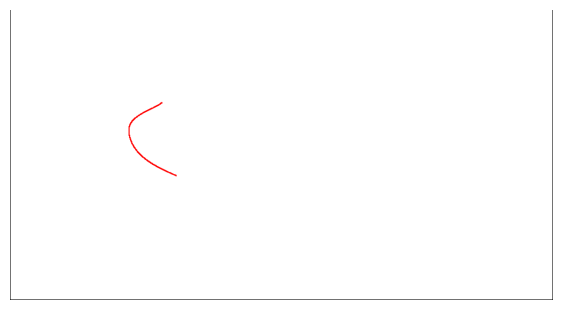

In [7]:
%matplotlib inline
gray_image152 = mpimg.imread('222.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

# 2

In [8]:
import matplotlib
matplotlib.use('TkAgg')  # Используйте TkAgg backend

import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
from PIL import Image, ImageDraw
import numpy as np
from scipy.interpolate import splprep, splev

# Загрузка полупрозрачного изображения
image_path = 'gray_image152.png'  # Укажите путь к вашему изображению
image = Image.open(image_path).convert("RGBA")

# Конвертируем изображение в массив numpy для отображения через matplotlib
image_array = np.array(image)

# Создаем список для хранения точек
points = []

# Обработчик кликов
def onclick(event):
    global points
    if event.button == MouseButton.LEFT:
        # Добавление точки в список
        points.append([event.xdata, event.ydata])
        
        # Отображение точки на изображении
        ax.plot(event.xdata, event.ydata, 'ro')
        fig.canvas.draw()
        
        # Когда было выбрано 6 точек, нарисовать кривую линию
        if len(points) == 6:
            line_image = draw_spline(points)
            save_line_image_with_border(line_image)
            fig.canvas.mpl_disconnect(cid)

# Функция для рисования кривой линии
def draw_spline(points):
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    # Используем сплайны для плавной линии через контрольные точки
    tck, u = splprep([x, y], s=0)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, ext=0)
    
    ax.plot(x_new, y_new, 'r-', lw=2)  # Рисование непрозрачной линии
    fig.canvas.draw()
    
    # Создаем пустое изображение для линии
    line_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(line_image)
    line_points = list(zip(x_new, y_new))
    draw.line(line_points, fill=(255, 0, 0, 255), width=2)
    
    return line_image

# Функция для сохранения только линии в отдельный файл с рамкой
def save_line_image_with_border(line_image):
    border_size = 10  # Размер рамки
    new_size = (line_image.width + 2 * border_size, line_image.height + 2 * border_size)
    
    # Создаем новое изображение с белым фоном и черной рамкой
    bordered_image = Image.new("RGBA", new_size, "white")
    bordered_draw = ImageDraw.Draw(bordered_image)
    bordered_draw.rectangle([(0, 0), (new_size[0]-1, new_size[1]-1)], outline="black", width=1)
    
    # Вставляем линию в центр рамки
    bordered_image.paste(line_image, (border_size, border_size), line_image)
    
    # Сохраняем изображение
    bordered_image.save("555.png")
    print("Изображение линии с рамкой сохранено как 555.png")

# Создание фигуры и отображение изображения
fig, ax = plt.subplots()
ax.imshow(image_array)

# Привязка обработчика кликов
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Изображение линии с рамкой сохранено как 555.png


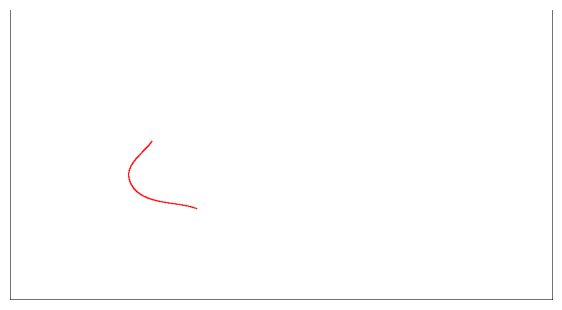

In [9]:
%matplotlib inline
gray_image152 = mpimg.imread('555.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

# 3 ЭТАЛОННАЯ ЛИНИЯ В ОТДЕЛЬНЫЙ ФАЙЛ ПЛЮС ЭТАЛОННОЕ ИЗОБРАЖЕНИЕ С ЛИНИЕЙ

In [14]:
matplotlib.use('TkAgg')  # Используйте TkAgg backend
# Специальная магическая команда для интерактивных графиков в Jupyter Notebook
#%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
from PIL import Image, ImageDraw
import numpy as np
from scipy.interpolate import splprep, splev

# Загрузка полупрозрачного изображения
image_path = 'gray_image152r.png'  # Укажите путь к вашему изображению
image = Image.open(image_path).convert("RGBA")

# Конвертируем изображение в массив numpy для отображения через matplotlib
image_array = np.array(image)

# Создаем список для хранения точек
points = []

# Обработчик кликов
def onclick(event):
    global points
    if event.button == MouseButton.LEFT:
        # Добавление точки в список
        points.append([event.xdata, event.ydata])
        
        # Отображение точки на изображении
        ax.plot(event.xdata, event.ydata, 'ro')
        fig.canvas.draw()
        
        # Когда было выбрано 6 точек, нарисовать кривую линию
        if len(points) == 6:
            line_image = draw_spline(points)
            save_combined_image(line_image)
            save_line_image(line_image)
            fig.canvas.mpl_disconnect(cid)

# Функция для рисования кривой линии
def draw_spline(points):
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    # Используем сплайны для плавной линии через контрольные точки
    tck, u = splprep([x, y], s=0)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, ext=0)
    
    ax.plot(x_new, y_new, 'r-', lw=2)  # Рисование непрозрачной линии
    fig.canvas.draw()
    
    # Создаем пустое изображение для линии
    line_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(line_image)
    line_points = list(zip(x_new, y_new))
    draw.line(line_points, fill=(255, 0, 0, 255), width=2)
    
    return line_image

# Функция для сохранения изображения с нанесённой линией
def save_combined_image(line_image):
    # Копируем исходное изображение
    combined_image = image.copy()
    combined_image = Image.alpha_composite(combined_image, line_image)
    combined_image.save("123.png")
    print("Изображение сохранено как 123.png")

# Функция для сохранения только линии в отдельный файл
def save_line_image(line_image):
    line_image.save("line_only.png")
    print("Изображение линии сохранено как line_only.png")

# Создание фигуры и отображение изображения
fig, ax = plt.subplots()
ax.imshow(image_array)

# Привязка обработчика кликов
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Изображение сохранено как 123.png
Изображение линии сохранено как line_only.png


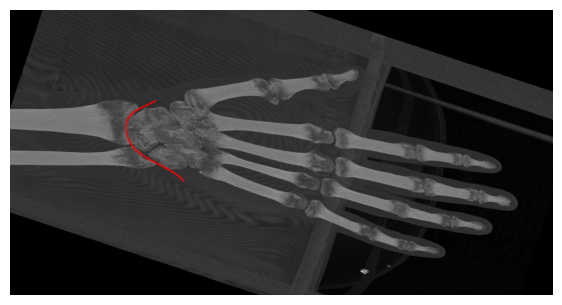

In [15]:
%matplotlib inline
gray_image152 = mpimg.imread('123.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

In [16]:
input_path = '123.png'
# Путь для сохранения преобразованного изображения
output_path = '123_rotated.png'

# Загрузка изображения
image = Image.open(input_path)

# Поворот изображения на 90 градусов против часовой стрелки
rotated_image = image.rotate(90, expand=True)

# Сохранение преобразованного изображения
rotated_image.save(output_path)

print(f"Image saved to {output_path}")

Image saved to 123_rotated.png


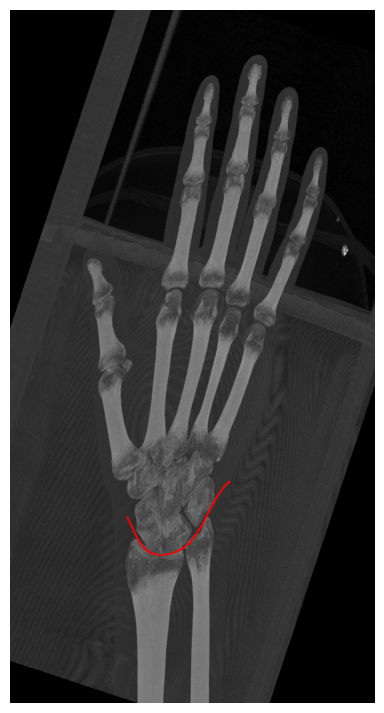

In [17]:
%matplotlib inline
gray_image542r = mpimg.imread('123_rotated.png')
plt.figure(figsize=(9, 9)) # Отображение изображения в оттенках серого
plt.imshow(gray_image542r, cmap='gray')
plt.axis('off')
plt.show()

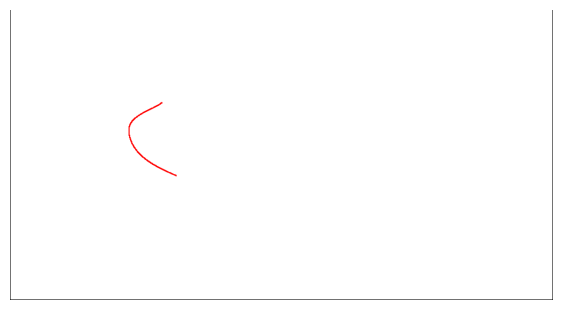

In [18]:
%matplotlib inline
gray_image152 = mpimg.imread('222.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

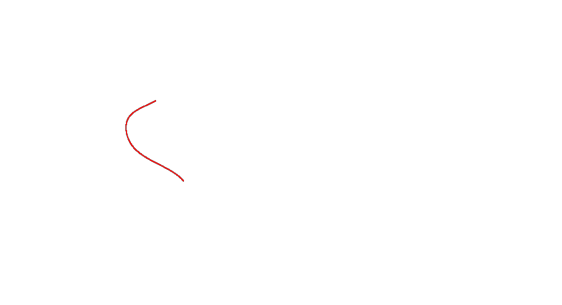

In [19]:
%matplotlib inline
gray_image152 = mpimg.imread('line_only.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

# ИЗОБРАЖЕНИЕ ПАТОЛОГИИ

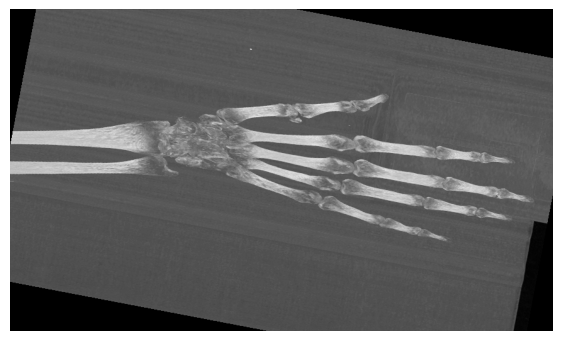

In [20]:
%matplotlib inline
gray_image542r = mpimg.imread('image542r.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image542r, cmap='gray')
plt.axis('off')
plt.show()

# ПЕРЕЗАПУСК!

# ПАТОЛОГИЯ С НАНЕСЁННОЙ ЭТАЛОННОЙ ЛИНИЕЙ

In [4]:
%matplotlib notebook
import tkinter as tk
from PIL import Image, ImageTk, ImageOps, ImageGrab

class ImageOverlayApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Image Overlay")

        # Загрузка изображений
        image1_path = "line_only.png"
        image2_path = "image542r.png"
        self.base_image = Image.open(image2_path)
        self.overlay_image = Image.open(image1_path).convert("RGBA")

        # Создание полупрозрачного наложения
        self.overlay_image.putalpha(128)  # Уровень прозрачности (0-255)

        # Конвертируем изображения для использования в tkinter
        self.base_image_tk = ImageTk.PhotoImage(self.base_image)
        self.overlay_image_tk = ImageTk.PhotoImage(self.overlay_image)

        # Создаём холст для отображения изображений
        self.canvas = tk.Canvas(root, width=self.base_image.width, height=self.base_image.height)
        self.canvas.pack()

        # Отображение основного изображения
        self.canvas.create_image(0, 0, anchor=tk.NW, image=self.base_image_tk)

        # Добавляем наложение
        self.overlay_item = self.canvas.create_image(0, 0, anchor=tk.NW, image=self.overlay_image_tk)

        # Переменные для управления перетаскиванием
        self.drag_data = {"x": 0, "y": 0, "item": None}

        # Привязка обработчиков мыши к холсту
        self.canvas.tag_bind(self.overlay_item, "<ButtonPress-1>", self.start_drag)
        self.canvas.tag_bind(self.overlay_item, "<B1-Motion>", self.drag)
        self.canvas.tag_bind(self.overlay_item, "<ButtonRelease-1>", self.stop_drag)

    def start_drag(self, event):
        self.drag_data["item"] = self.overlay_item
        self.drag_data["x"] = event.x
        self.drag_data["y"] = event.y

    def drag(self, event):
        dx = event.x - self.drag_data["x"]
        dy = event.y - self.drag_data["y"]
        self.canvas.move(self.drag_data["item"], dx, dy)
        self.drag_data["x"] = event.x
        self.drag_data["y"] = event.y

    def stop_drag(self, event):
        self.drag_data["item"] = None
        self.drag_data["x"] = 0
        self.drag_data["y"] = 0

        # Сохраняем текущее изображение в файл
        self.save_combined_image()

    def save_combined_image(self):
        # Захват содержимого холста
        x = self.canvas.winfo_rootx()
        y = self.canvas.winfo_rooty()
        width = self.canvas.winfo_width()
        height = self.canvas.winfo_height()

        # Захват области холста
        canvas_image = ImageGrab.grab((x, y, x + width, y + height))

        # Сохранение в файл
        canvas_image.save("4.png")
        print("Совмещённое изображение сохранено как 4.png")

if __name__ == "__main__":
    root = tk.Tk()
    app = ImageOverlayApp(root)
    root.mainloop()

Совмещённое изображение сохранено как 4.png


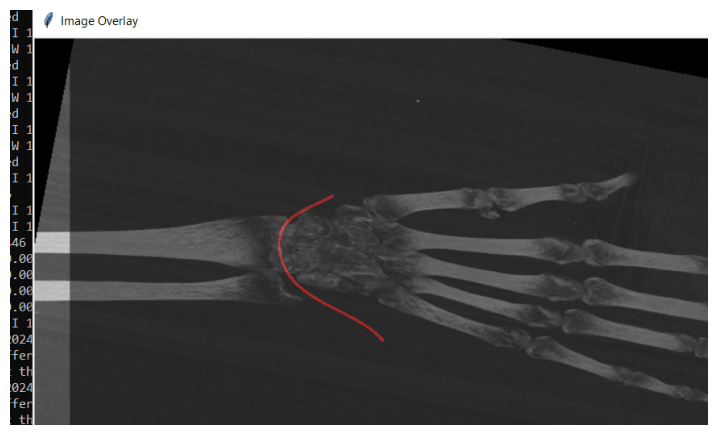

In [5]:
%matplotlib inline
gray_image542r = mpimg.imread('4.png')
plt.figure(figsize=(9, 9)) # Отображение изображения в оттенках серого
plt.imshow(gray_image542r, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
input_path = '4.png'
# Путь для сохранения преобразованного изображения
output_path = '4_rotated.png'

# Загрузка изображения
image = Image.open(input_path)

# Поворот изображения на 90 градусов против часовой стрелки
rotated_image = image.rotate(90, expand=True)

# Сохранение преобразованного изображения
rotated_image.save(output_path)

print(f"Image saved to {output_path}")

Image saved to 4_rotated.png


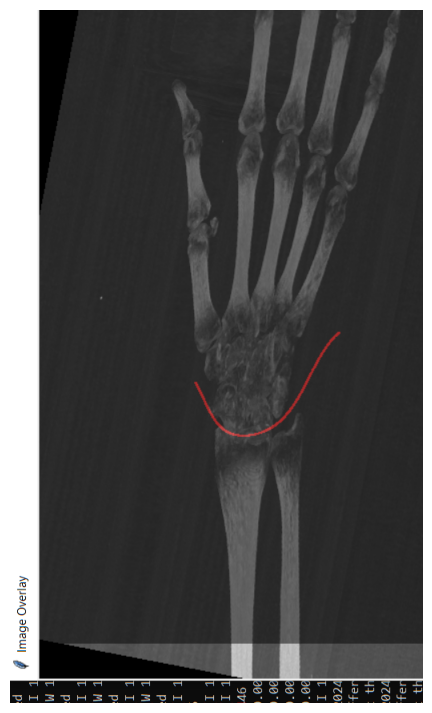

In [8]:
%matplotlib inline
gray_image542r = mpimg.imread('4_rotated.png')
plt.figure(figsize=(9, 9)) # Отображение изображения в оттенках серого
plt.imshow(gray_image542r, cmap='gray')
plt.axis('off')
plt.show()